In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow
from PIL import Image

## Gambar koin dari library Skimage

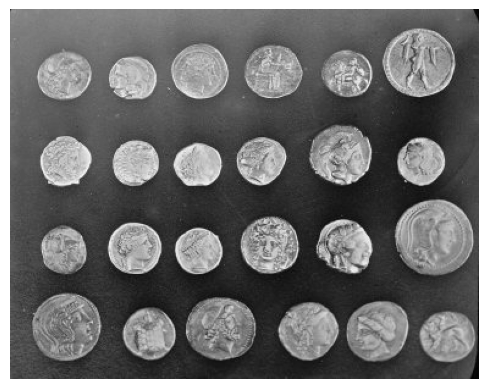

In [ ]:
from skimage import data
coins = data.coins()

plt.imshow(coins, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
total_coins = 25

In [ ]:
pixel_values = coins.reshape((-1, 1)) # Mengubah bentuk pixel menjadi array 1D
pixel_values = np.float32(pixel_values) # Konversi tipe data pixel menjadi float

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2) # Kriteria berhenti, jika mencapai 100 iterasi atau posisi perubahan pusat cluster < 0.2

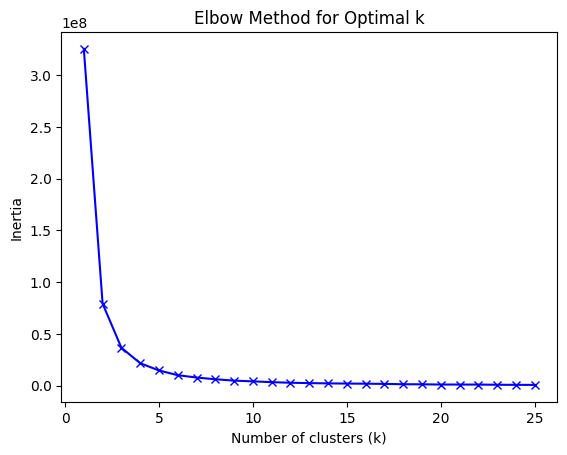

In [ ]:
inertia_values = []
K = range(1, total_coins+1)

for k in K:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    inertia = np.sum((pixel_values - centers[labels.flatten()]) ** 2) # Menghitung inersia (jumlah kuadrat jarak dari piksel ke pusat kluster)
    inertia_values.append(inertia)

plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
k = 3

# Melakukan segmentasi K-means dengan pusat awal cluster acak, jumlah pengulangan k-means = 10
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers) # Nilai pusat cluster dikonvesi ke tipe uint8 agar bisa digunakan sebagai nilai piksel
labels = labels.flatten()

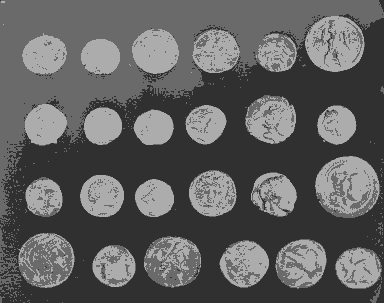

In [ ]:
# Membuat gambar yang tersegmentasi dengan nilai pixel diubah menjadi nilai dari pusat kluster yang ditentukan oleh label kluster
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(coins.shape)

cv2_imshow(segmented_image)

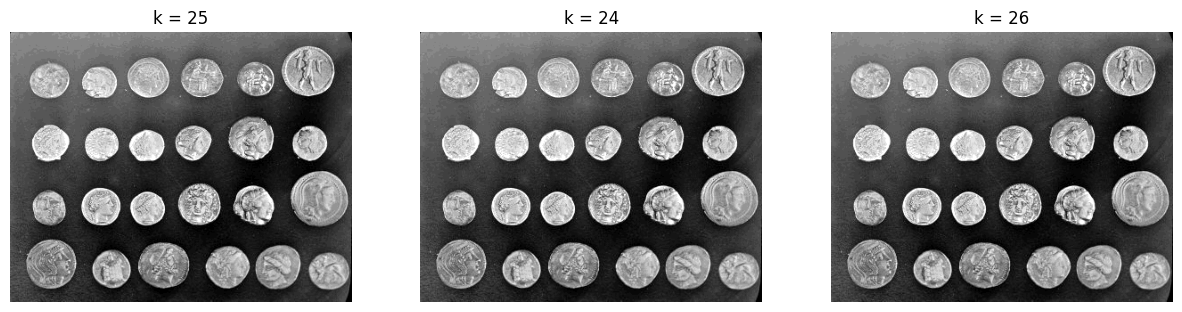

In [ ]:
k_values = [total_coins, total_coins - 1, total_coins + 1]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate(k_values):
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    centers = np.uint8(centers)
    labels = labels.flatten()

    segmented_image = centers[labels]
    segmented_image = segmented_image.reshape(coins.shape)

    axs[i].imshow(segmented_image, cmap='gray')
    axs[i].set_title(f'k = {k}')
    axs[i].axis('off')

plt.show()

## Gambar koin dari Internet

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving koin.jpg to koin.jpg


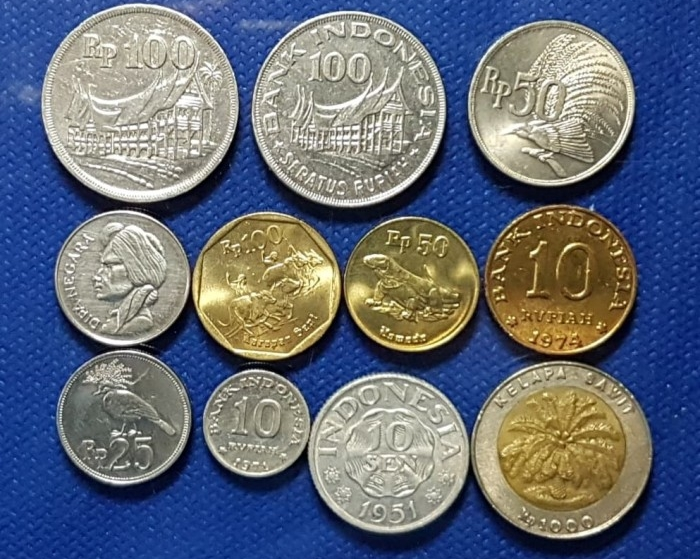

In [ ]:
image = Image.open("koin.jpg")
image

In [ ]:
total_coins = 11

In [ ]:
image = cv2.imread('koin.jpg')

image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Gambar berwarna
image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Gambar grayscale

Jika gambar di grayscale terlebih dahulu

array([[74, 83, 94, ..., 66, 58, 53],
       [74, 82, 92, ..., 65, 55, 48],
       [81, 80, 85, ..., 60, 52, 45],
       ...,
       [55, 51, 48, ..., 44, 42, 41],
       [52, 49, 46, ..., 42, 42, 41],
       [51, 48, 43, ..., 43, 43, 41]], dtype=uint8)
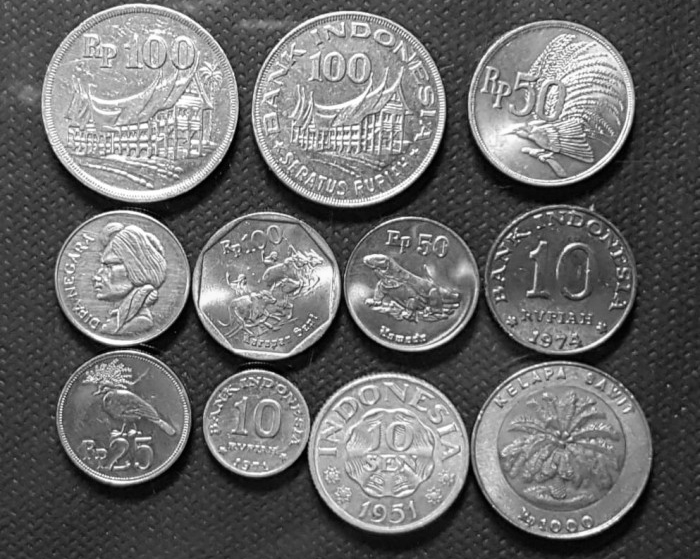

In [ ]:
image_grayscale

In [ ]:
pixel_values = image_grayscale.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

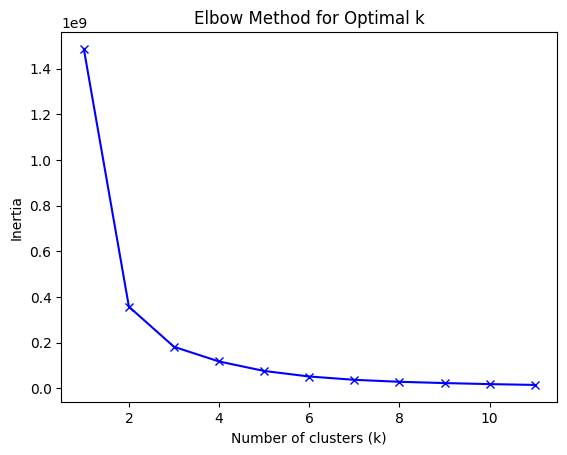

In [ ]:
inertia_values = []
K = range(1, total_coins+1)

for k in K:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    inertia = np.sum((pixel_values - centers[labels.flatten()]) ** 2)
    inertia_values.append(inertia)

plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
k = 3

_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

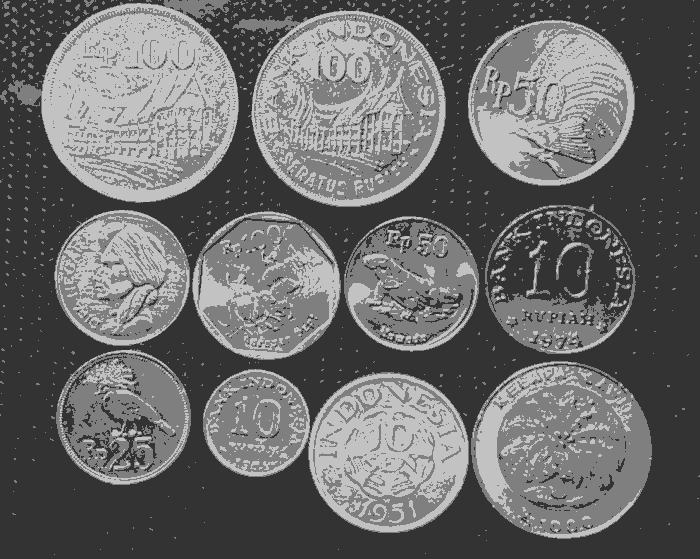

In [ ]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_grayscale.shape)

cv2_imshow(segmented_image)

Jika gambar berwarna

array([[[ 43,  75, 150],
        [ 52,  84, 159],
        [ 63,  95, 170],
        ...,
        [ 38,  66, 140],
        [ 30,  58, 132],
        [ 25,  53, 127]],

       [[ 43,  75, 150],
        [ 51,  83, 158],
        [ 61,  93, 168],
        ...,
        [ 37,  65, 139],
        [ 27,  55, 129],
        [ 20,  48, 122]],

       [[ 50,  82, 157],
        [ 49,  81, 156],
        [ 54,  86, 161],
        ...,
        [ 31,  61, 134],
        [ 24,  52, 126],
        [ 17,  45, 119]],

       ...,

       [[ 23,  56, 137],
        [ 19,  52, 133],
        [ 16,  49, 130],
        ...,
        [ 16,  44, 117],
        [ 14,  42, 115],
        [ 13,  41, 114]],

       [[ 20,  53, 134],
        [ 17,  50, 131],
        [ 14,  47, 128],
        ...,
        [ 14,  42, 115],
        [ 14,  42, 115],
        [ 13,  41, 114]],

       [[ 19,  52, 133],
        [ 16,  49, 130],
        [ 11,  44, 125],
        ...,
        [ 15,  43, 116],
        [ 15,  43, 116],
        [ 13,  41, 114]]], dtype=uint8)
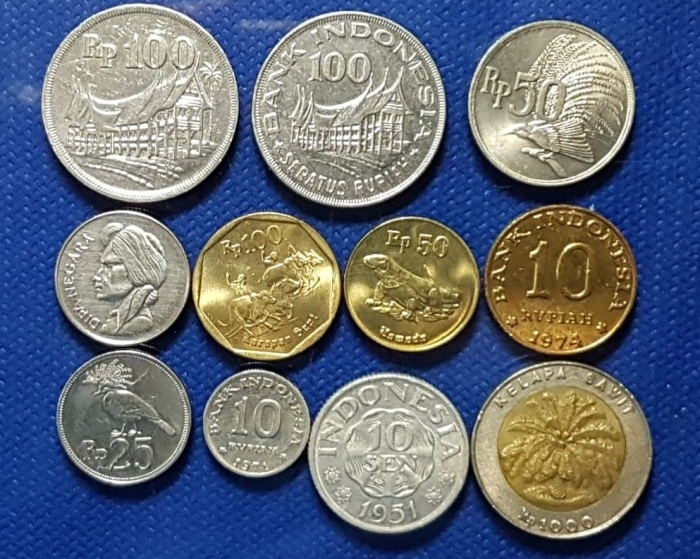

In [ ]:
image_color

In [ ]:
pixel_values = image_color.reshape((-1, 3)) #RGB
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

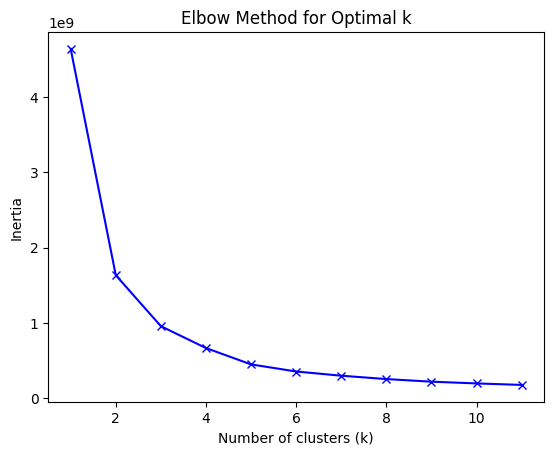

In [ ]:
inertia_values = []
K = range(1, total_coins+1)

for k in K:
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    inertia = np.sum((pixel_values - centers[labels.flatten()]) ** 2)
    inertia_values.append(inertia)

plt.plot(K, inertia_values, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
k = 3

_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

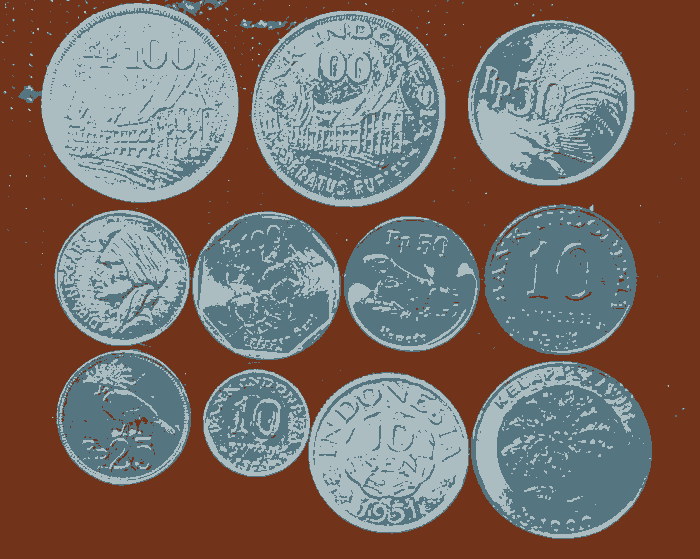

In [ ]:
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image_color.shape)

cv2_imshow(segmented_image)